In [454]:
####################################
## Submitted by - Vaibhav Chhabra ##
## Roll No. - AI20BTECH11022      ##
####################################

################################################################################
# Project on House Price Prediction and analysing the dataset:

# The project involves using linear regression algorithm on a dataset of
# various houses to train the model to predict the sale price of a house whose
# data is given.

# The data is imported through .csv files and the result of testing data is 
# exported as a .csv file.

# The dataset of various houses includes the following factors:
# MSSubClass: type of dwelling for sale
# LotArea: Lot size in square feet
# OverallQual: Overall material and finish of the house
# OverallCond: overall condition of the house
# YearBuilt: Original construction date
# BsmtFinSF: Finished basement area in square feet
# BsmtUnfSF: Unfinished basement area in square feet
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# LowQualFinSF: Low quality finished square feet (all floors)
# BsmtFullBath: Basement full bathrooms
# BsmtHalfBath: Basement half bathrooms
# FullBath: Full bathrooms above grade
# HalfBath: Half baths above grade
# BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)
# KitchenAbvGr: Kitchens above grade
# TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
# Fireplaces: Number of fireplaces
# GarageCars: Size of garage in car capacity
# GarageArea: Size of garage in square feet
# WoodDeckSF: Wood deck area in square feet
# OpenPorchSF: Open porch area in square feet
# EnclosedPorch: Enclosed porch area in square feet
# PoolArea: Pool area in square feet
# MoSold: Month Sold (MM)
# YrSold: Year Sold (YYYY)
# SalePrice: Sale Price of the house

# Number of training samples = 2400
# Number of testing samples = 519
################################################################################

In [455]:
# importing all the required libraries
import pandas as pd
import numpy as np
import io
from google.colab import files # for local file uploading
from google.colab import drive # for opening file from google drive
from matplotlib import pyplot as plt

In [456]:
# Opening the training dataset .csv file uploaded on the google drive
drive.mount('/drive')
house_details_dataframe = pd.read_csv('/drive/My Drive/AI1104 project/House_price_prediction_train.csv')


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [457]:
#printing the first 5 rows of the dataset to show how the data looks
house_details_dataframe.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,706,150,856,854,0,1,0,2,1,3,1,8,0,2,548,0,61,0,0,2,2008,208500.0
1,2,20,9600,6,8,1976,978,284,1262,0,0,0,1,2,0,3,1,6,1,2,460,298,0,0,0,5,2007,181500.0
2,3,60,11250,7,5,2001,486,434,920,866,0,1,0,2,1,3,1,6,1,2,608,0,42,0,0,9,2008,223500.0
3,4,70,9550,7,5,1915,216,540,961,756,0,1,0,1,0,3,1,7,1,3,642,0,35,272,0,2,2006,140000.0
4,5,60,14260,8,5,2000,655,490,1145,1053,0,1,0,2,1,4,1,9,1,3,836,192,84,0,0,12,2008,250000.0


In [459]:
# The last column of the dataset is the SalesPrice, which is the label for this
# particular model. All other columns except Id, are the input to train our model.

# converting the csv file to a matrix
house_details = house_details_dataframe.to_numpy()

no_of_houses, no_of_details = house_details.shape

# extracting the input data from the matrix
house_details_input = house_details[:,: no_of_details-1]

# extracting the label(Sale Price of House) from the matrix
house_sale_price = house_details[:,no_of_details-1]

house_details_input[:,0] = np.ones(no_of_houses)

house_details_input_T = np.transpose(house_details_input)

# If X is the input data matrix, X_T is its transpose and Y is the label matrix,
# the weight matrix B for the trained model is given by B = inverse(X_T.X).(X_T.Y)

# finding the weights of the model using linear regression method
weights = np.dot(np.linalg.inv(np.dot(house_details_input_T,house_details_input)),np.dot(house_details_input_T,house_sale_price))

print('Coefficients for the factors:\n',weights)

Coefficients for the factors:
 [-2.68847822e+06 -1.03380033e+02  8.46608974e-01  8.53076644e+03
  3.78879380e+03  2.82482965e+02  1.29913171e+01  9.34842160e+00
  3.60677627e+01  3.78478322e+01  4.37838773e+00  4.63689594e+03
  4.06584719e+03  2.16197511e+03 -2.39424102e+03 -3.80069758e+03
 -1.90078794e+04  6.40438448e+03 -3.55386520e+02  4.30871343e+03
  2.86640273e+00  1.64379163e+01 -6.85067819e+00  2.01639495e+01
  1.76035956e+01  7.18879716e+02  1.06504034e+03]


In [460]:
# Opening the testing dataset file .csv file uploaded on the google drive
drive.mount('/drive')
house_details_test_dataframe = pd.read_csv('/drive/My Drive/AI1104 project/House_price_prediction_test.csv')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [461]:
# First 5 rows of the test data file
house_details_test_dataframe.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,BsmtFinSF,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MoSold,YrSold
0,2401,20,5175,5,8,1958,150,254,808,0,0,0,0,1,0,2,1,5,0,1,308,143,0,0,0,7,2007
1,2402,20,9600,5,6,1955,368,710,1150,0,0,1,0,1,0,2,1,6,0,1,288,0,0,0,0,10,2007
2,2403,90,8668,5,5,1968,0,1560,1560,0,0,0,0,2,0,4,2,8,0,3,792,0,0,0,0,5,2007
3,2404,85,10050,5,6,1966,602,191,1280,0,0,0,1,2,0,3,1,6,1,2,432,140,40,0,0,6,2007
4,2405,80,9600,6,5,1961,600,618,1254,0,0,1,0,1,0,3,1,6,1,2,525,0,0,0,0,5,2007


In [462]:
# converting the csv file to a matrix
house_details_test = house_details_test_dataframe.to_numpy()

no_of_test_houses, no_of_test_details = house_details_test.shape

house_details_test[:,0] = np.ones(no_of_test_houses)

# Sale Price of house matrix = product of house details matrix with calculated weights
house_test_sale_price = np.dot(house_details_test,weights)


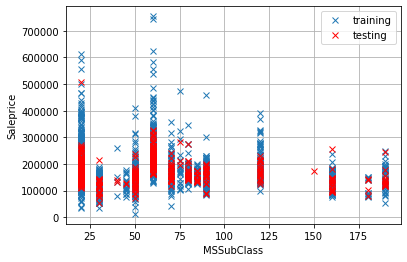

In [464]:
# plotting training and test datas with major factors

plt.xlabel('MSSubClass')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['MSSubClass'],house_details_dataframe['SalePrice'],'x', label = 'training')
plt.plot(house_details_test_dataframe['MSSubClass'],house_test_sale_price,'rx', label = 'testing')
plt.grid(True)
plt.legend()

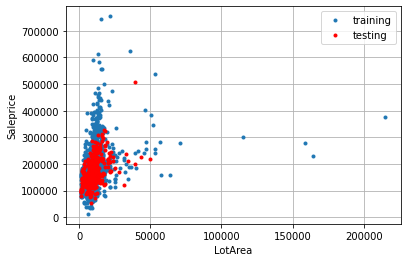

In [465]:
plt.xlabel('LotArea')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['LotArea'],house_details_dataframe['SalePrice'],'.', label = 'training')
plt.plot(house_details_test_dataframe['LotArea'],house_test_sale_price,'r.', label = 'testing')
plt.grid(True)
plt.legend()

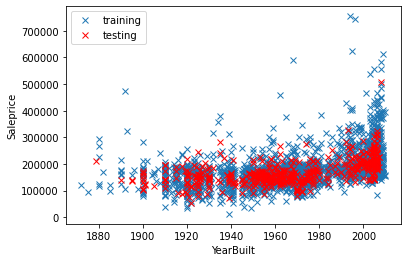

In [466]:
plt.xlabel('YearBuilt')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['YearBuilt'],house_details_dataframe['SalePrice'],'x', label = 'training')
plt.plot(house_details_test_dataframe['YearBuilt'],house_test_sale_price,'rx', label = 'testing')
plt.legend()

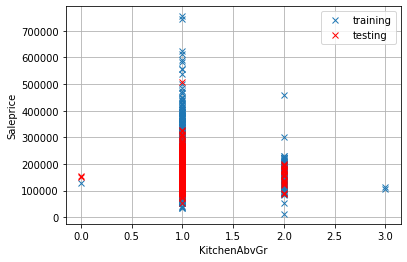

In [467]:
plt.xlabel('KitchenAbvGr')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['KitchenAbvGr'],house_details_dataframe['SalePrice'],'x', label = 'training')
plt.plot(house_details_test_dataframe['KitchenAbvGr'],house_test_sale_price,'rx', label = 'testing')
plt.grid(True)
plt.legend()

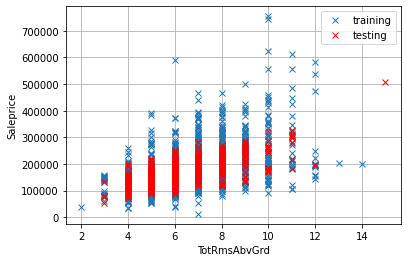

In [468]:
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['TotRmsAbvGrd'],house_details_dataframe['SalePrice'],'x', label = 'training')
plt.plot(house_details_test_dataframe['TotRmsAbvGrd'],house_test_sale_price,'rx', label = 'testing')
plt.grid(True)
plt.legend()

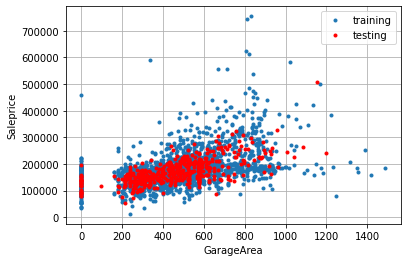

In [469]:
plt.xlabel('GarageArea')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['GarageArea'],house_details_dataframe['SalePrice'],'.', label = 'training')
plt.plot(house_details_test_dataframe['GarageArea'],house_test_sale_price,'r.', label = 'testing')
plt.grid(True)
plt.legend()

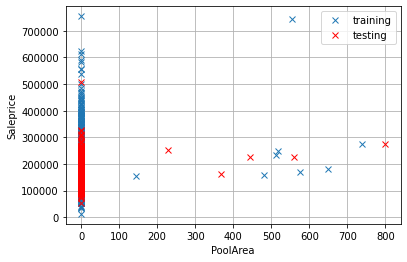

In [470]:
plt.xlabel('PoolArea')
plt.ylabel('Saleprice')
plt.plot(house_details_dataframe['PoolArea'],house_details_dataframe['SalePrice'],'x', label = 'training')
plt.plot(house_details_test_dataframe['PoolArea'],house_test_sale_price,'rx', label = 'testing')
plt.grid(True)
plt.legend()

In [471]:
# converting the test result to a .csv file
house_id_test = [no_of_houses+i+1 for i in range(no_of_test_houses)]

Test_Result = [house_id_test,house_test_sale_price]
Test_Result = np.transpose(Test_Result)

house_test_sale_price_dataframe = pd.DataFrame(Test_Result, columns = ['Id','SalePrice'])
house_test_sale_price_dataframe

house_test_sale_price_dataframe.to_csv('drive/My Drive/AI1104 project/house_test_price_prediction.csv')

,Id,SalePrice
0,2401.0,131052.096440
1,2402.0,156593.436370
2,2403.0,156596.684477
3,2404.0,157547.047371
4,2405.0,159970.051106
...,...,...
514,2915.0,101382.118556
515,2916.0,104617.696436
516,2917.0,187341.073345
517,2918.0,137459.991582
